# Gene expression clustering

## 1. Gene clustering

Loading and filtering the dataset.

In [6]:
import pandas as pd

df = pd.read_csv("mmc2.csv", index_col=0)

cell_types_to_keep = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.4.Sp.aCD3+CD40.18hr", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp",
    "NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d",
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

filtered_df = df[cell_types_to_keep]
filtered_df.to_csv("filtered_abT_Tact_Stem.csv")


In [7]:
filtered_df.head()
filtered_df.shape

(17535, 29)

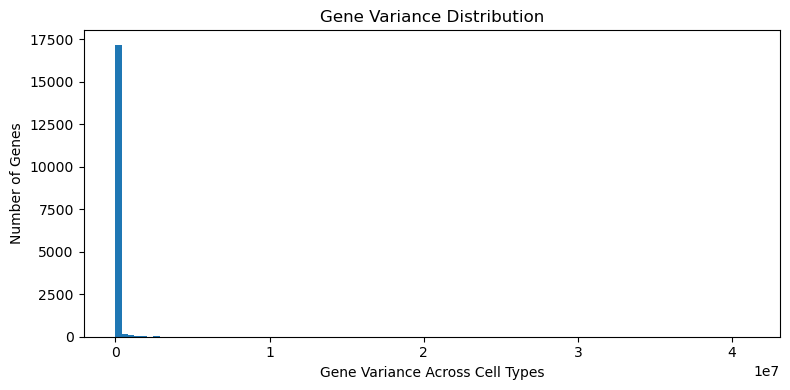

count    1.753500e+04
mean     5.970756e+04
std      6.481425e+05
min      3.050157e-06
25%      3.211117e+00
50%      4.267316e+02
75%      4.783711e+03
max      4.104707e+07
dtype: float64

In [8]:
import matplotlib.pyplot as plt

# Calculate variance for each gene across the 29 cell types
gene_variances = filtered_df.var(axis=1)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(gene_variances, bins=100)
plt.xlabel("Gene Variance Across Cell Types")
plt.ylabel("Number of Genes")
plt.title("Gene Variance Distribution")
plt.tight_layout()
plt.show()

# Look at exact stats
gene_variances.describe()


**Fig. 1: Gene variance distribution**

In [9]:
# Filter genes by variance threshold
var_threshold = 500
high_var_genes = gene_variances[gene_variances > var_threshold].index
refined_df = filtered_df.loc[high_var_genes]

print(f"Original shape: {filtered_df.shape}")
print(f"After variance filtering: {refined_df.shape}")


Original shape: (17535, 29)
After variance filtering: (8494, 29)


In [13]:
from sklearn.preprocessing import StandardScaler

# Transpose: rows = samples (cell types), columns = features (genes)
transposed = refined_df.T

# Z-score scaling
scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)

# Back to DataFrame with labels
transposed_scaled_df = pd.DataFrame(transposed_scaled, index=transposed.index, columns=transposed.columns)


In [11]:
transposed = refined_df.T
transposed.head()

,0610007P14Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,1110004E09Rik,1110004F10Rik,1110008L16Rik,...,Zswim8,Zufsp,Zw10,Zwilch,Zwint,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
preT.DN1.Th,162.641117,68.070719,160.246297,155.767862,146.959609,147.315383,110.833671,72.055933,749.822124,140.782792,...,75.250417,107.574881,196.329630,59.813775,412.930595,174.486586,1102.093601,145.971474,305.759992,165.105875
preT.DN2a.Th,206.945221,82.468806,125.475307,273.998186,166.023337,146.009167,137.259987,72.322612,804.531997,119.763309,...,52.010176,86.629482,213.695086,92.412375,440.133238,133.170236,727.291384,154.743640,260.956800,211.656296
preT.DN2b.Th,209.187788,89.769337,155.928005,154.269870,245.243593,161.827642,124.749368,82.909098,802.684643,85.457918,...,63.935259,80.287351,226.407453,122.999419,364.562447,166.528710,399.395780,132.590213,249.726900,202.104434
preT.DN3.Th,198.421365,57.661619,120.692893,129.834226,225.662176,187.582633,178.268286,145.793925,817.759773,79.469101,...,62.974653,86.365967,262.319019,100.864308,384.143310,164.850226,248.382338,150.298107,291.366650,185.255146
T.DN4.Th,215.056475,76.399214,118.433597,197.843435,252.196726,153.613650,152.467579,182.459917,957.467722,89.810155,...,44.574791,81.943980,305.814673,144.660778,362.089698,146.115393,142.239852,132.912133,274.503519,242.887242


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)


#### PCA, UMAP, t-SNE of RNA-seq expression per cell type

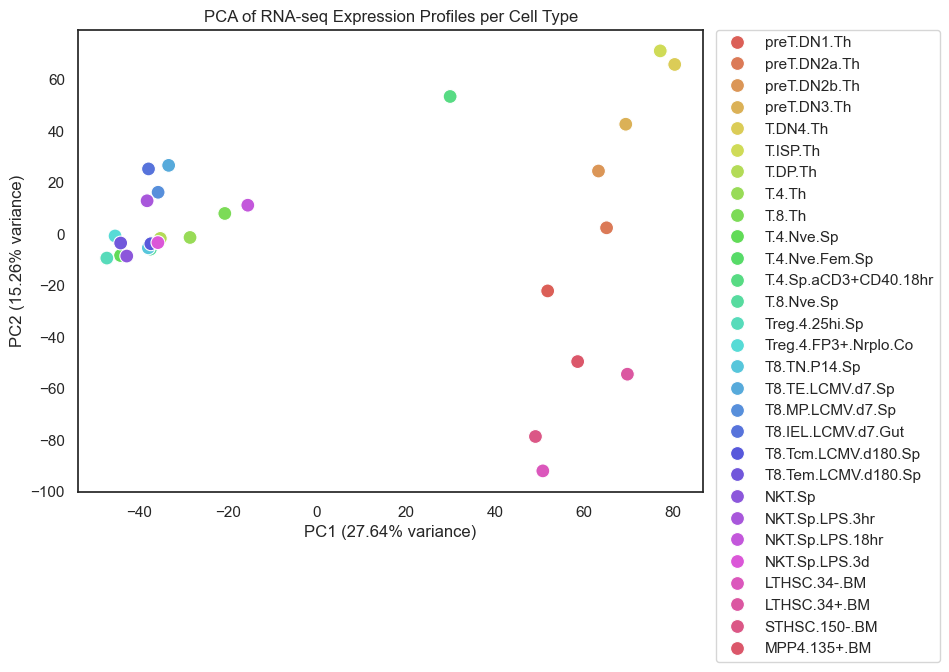

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set style to match the chromatin accessibility plot (no grid)
sns.set_style("white")  # alternatives: "white", "ticks", "dark", etc.

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed_scaled)

# Build PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)
pca_df["CellType"] = pca_df.index

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType",
    palette=sns.color_palette("hls", n_colors=pca_df["CellType"].nunique()),
    s=100,
    ax=ax
)

# Axes and legend
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
ax.set_title("PCA of RNA-seq Expression Profiles per Cell Type")
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

fig.subplots_adjust(right=0.75)
plt.show()


**Fig.2: PCA of RNA-seq expression profiles per cell type (filtered and scaled)**

In [14]:
pca_df  # prints the full table

,PC1,PC2,CellType
preT.DN1.Th,51.812371,-22.163610,preT.DN1.Th
preT.DN2a.Th,65.049692,2.336479,preT.DN2a.Th
preT.DN2b.Th,63.233074,24.380451,preT.DN2b.Th
preT.DN3.Th,69.364338,42.544821,preT.DN3.Th
T.DN4.Th,80.363870,65.748445,T.DN4.Th
T.ISP.Th,77.111275,71.012311,T.ISP.Th
T.DP.Th,-35.234807,-1.781571,T.DP.Th
T.4.Th,-28.557515,-1.410194,T.4.Th
T.8.Th,-20.740881,7.905591,T.8.Th
T.4.Nve.Sp,-44.176999,-8.418209,T.4.Nve.Sp


In the end, we want to compare the results from the gene clustering analysis with the results from the ATAc-seq analysis, so I wil rename a few things to avoid mix-up later.

First, we need to scale and z-score the data.

In [15]:
# Use the already scaled data
rna_transposed = transposed_scaled_df  # instead of refined_df.T

rna_pca = PCA(n_components=2)
rna_pca_result = rna_pca.fit_transform(rna_transposed)

rna_pca_df = pd.DataFrame(rna_pca_result, columns=["PC1", "PC2"], index=rna_transposed.index)
rna_pca_df["CellType"] = rna_pca_df.index

In [16]:
transposed_scaled_df.mean().mean(), transposed_scaled_df.std().mean()


(np.float64(1.8413116817883074e-17), np.float64(1.0177004891982149))

Now, running the analysis.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


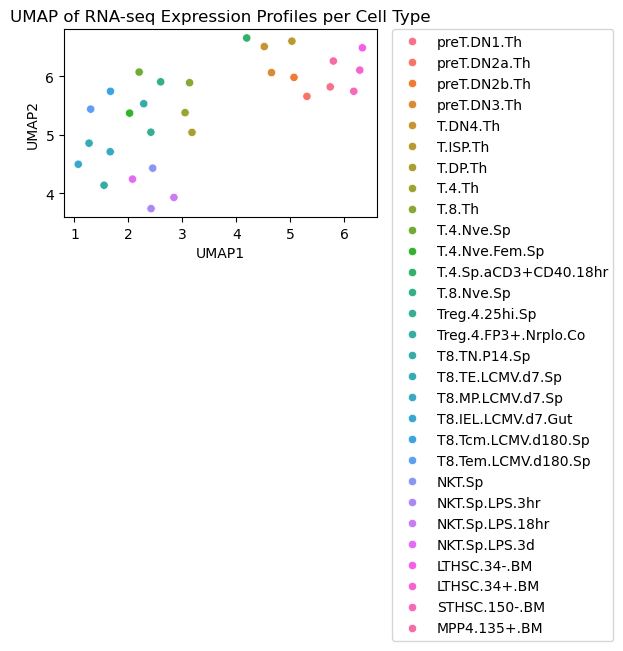

In [17]:
import umap.umap_ as umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(transposed_scaled)

# Make a DataFrame
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=refined_df.columns)
umap_df["CellType"] = umap_df.index

# Plot
umap_df = umap_df.reset_index(drop=True)
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType")
plt.title("UMAP of RNA-seq Expression Profiles per Cell Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

**Fig. 3: UMAP of RNA-seq expression profiles per cell type (filtered and scaled)**

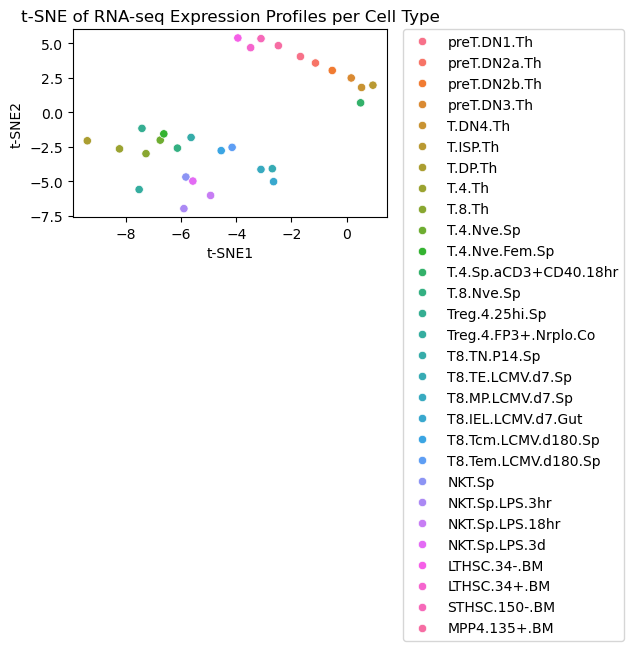

In [18]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(transposed_scaled)

# Make a DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"], index=refined_df.columns)
tsne_df["CellType"] = tsne_df.index

# Plot
tsne_df = tsne_df.reset_index(drop=True)
sns.scatterplot(data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType")
plt.title("t-SNE of RNA-seq Expression Profiles per Cell Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


**Fig. 4: t-SNE of RNA-seq expression profiles per cell type (filtered and scled)**

Now, we will plot all three graphs again, just side-by-side for easier comparison later.

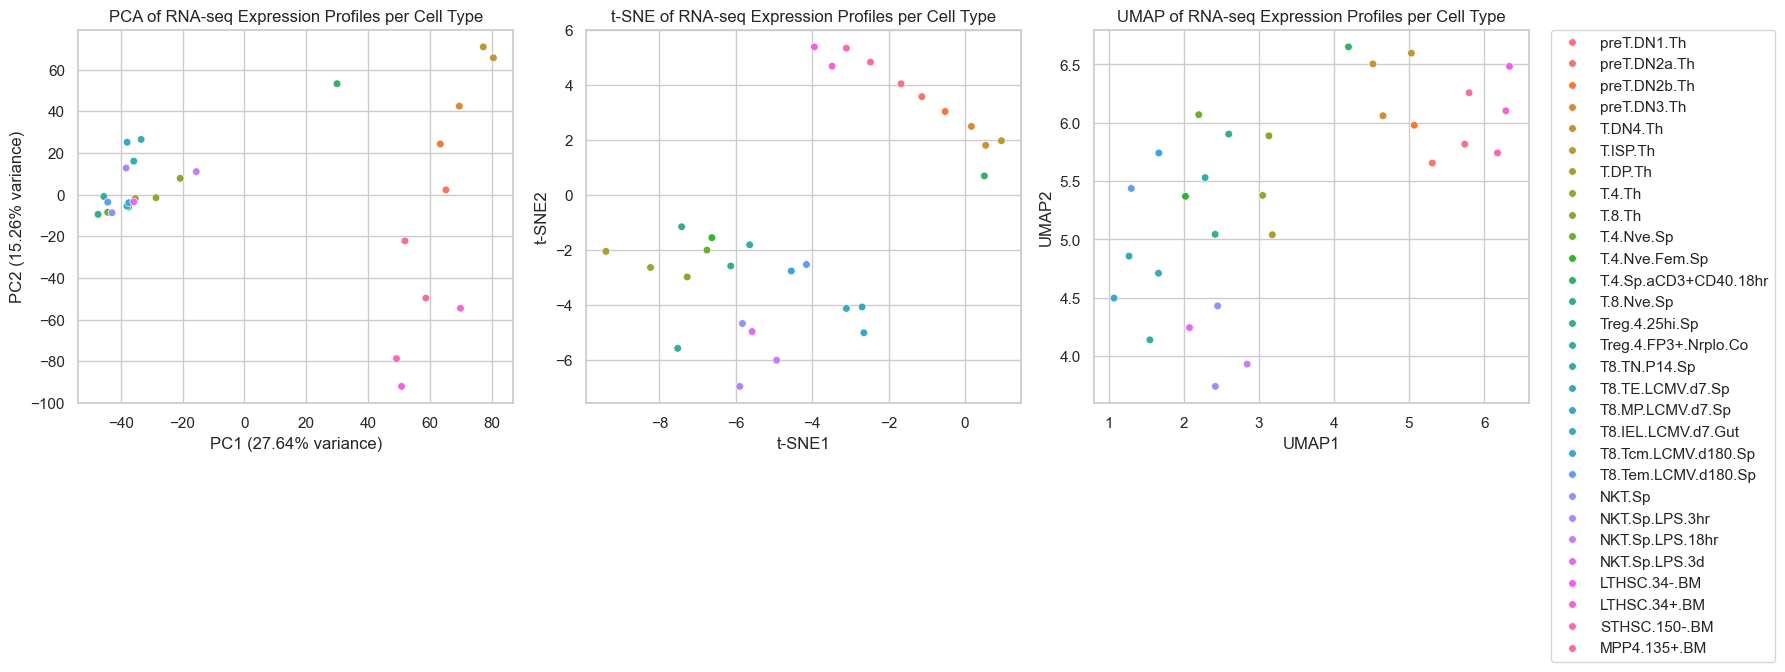

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with 1 row and 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#  PCA 
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType", s=30,
    ax=axes[0], legend=False
)
axes[0].set_title("PCA of RNA-seq Expression Profiles per Cell Type")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

#  t-SNE 
sns.scatterplot(
    data=tsne_df,
    x="t-SNE1", y="t-SNE2",
    hue="CellType", s=30,
    ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of RNA-seq Expression Profiles per Cell Type")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

#  UMAP 
sns.scatterplot(
    data=umap_df,
    x="UMAP1", y="UMAP2",
    hue="CellType", s=30,
    ax=axes[2]
)
axes[2].set_title("UMAP of RNA-seq Expression Profiles per Cell Type")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Move legend to the right of UMAP plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


**Fig. 5: PCA, UMAP, t-SNE of RNA-seq expression profiles per cell type side-by-side**

#### PCA, UMAP, t-SNE of RNA-seq expression profiles per groups

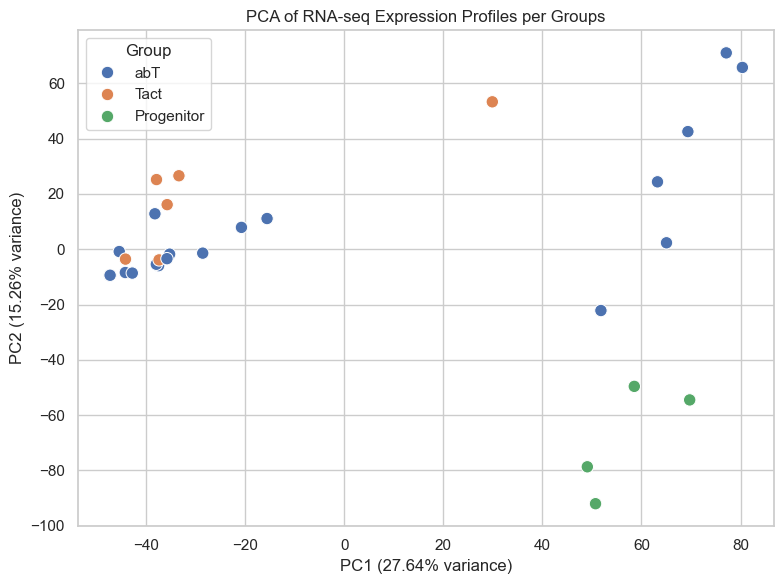

In [20]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load transposed_scaled
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=refined_df.columns)

# Define cell type groups
abT_cells = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th", "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp", "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co", "T8.TN.P14.Sp", "NKT.Sp",
    "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"
]

tact_cells = [
    "T.4.Sp.aCD3+CD40.18hr", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp"
]

stem_cells = [
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

# Map cell types to groups
group_map = {}
for sample in abT_cells:
    group_map[sample] = "abT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"

# Add group labels
pca_df["Group"] = pca_df.index.map(lambda name: group_map.get(name, "Other"))

# Plot PCA by group
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", s=80)
plt.title("PCA of RNA-seq Expression Profiles per Groups")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.tight_layout()
plt.show()


**Fig. 6: PCA of RNA-seq expression profiles per groups**

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


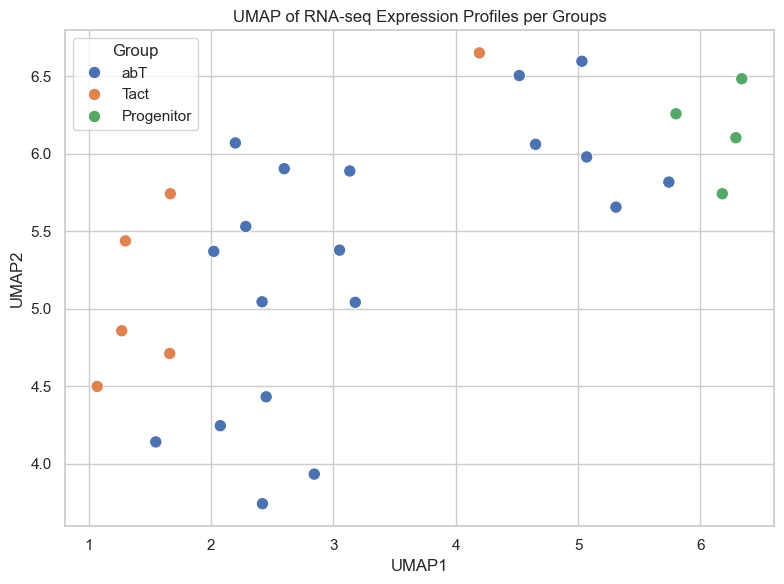

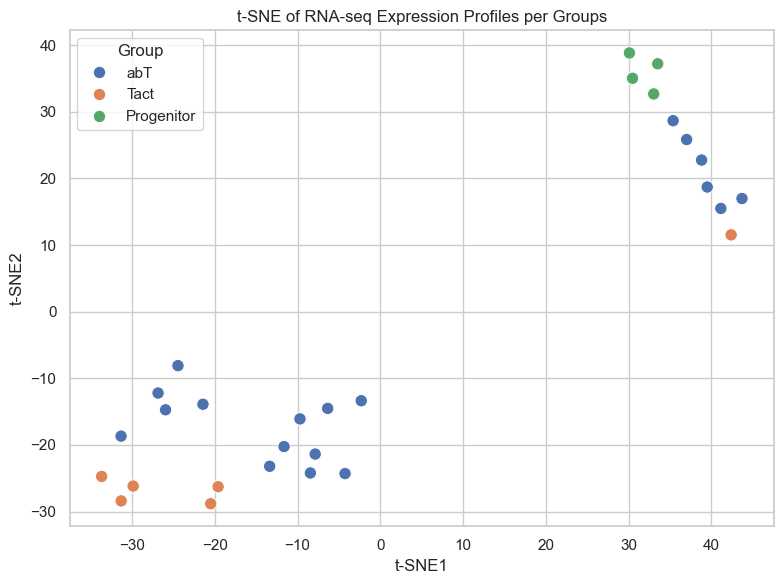

In [21]:
from umap import UMAP
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run UMAP and t-SNE on transposed_scaled
umap_result = UMAP(n_components=2, random_state=42).fit_transform(transposed_scaled)
tsne_result = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(transposed_scaled)

# Add results to your pca_df (which already has Group info)
pca_df[["UMAP1", "UMAP2"]] = umap_result
pca_df[["tSNE1", "tSNE2"]] = tsne_result

# Plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=80)
plt.title("UMAP of RNA-seq Expression Profiles per Groups")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=80)
plt.title("t-SNE of RNA-seq Expression Profiles per Groups")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.tight_layout()
plt.show()


**Fig. 7: UMAP (above) t-SNE (below) of RNA-seq expression profiles per groups**

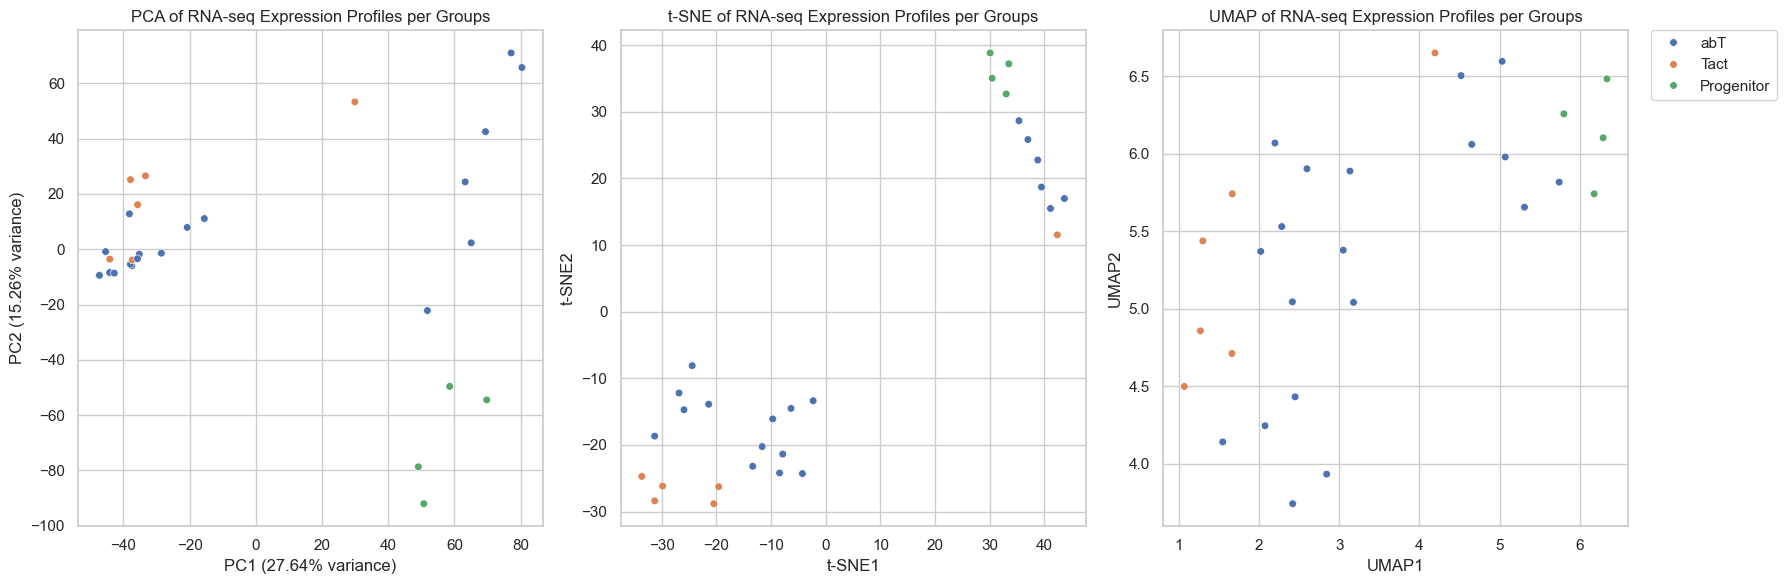

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Group", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of RNA-seq Expression Profiles per Groups")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# t-SNE plot
sns.scatterplot(
    data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of RNA-seq Expression Profiles per Groups")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# UMAP plot
sns.scatterplot(
    data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of RNA-seq Expression Profiles per Groups")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Place legend outside last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


**Fig. 8: PCA, t-SNE, UMAP of RNA-seq expression profiles per groups**

# 2. Gene similarity matrix

**Goal**: Assess how similar or different gene expression profiles are across cell types based on RNA-seq data.

This results will support the interpretation of PCA, UMAP and t-SNE plots with quantitative metrics. We are computing both for Pearson correlation and Euclidean distance.

Pearson correlation finds cell types with similar regulatory programs (regardless of how strongly genes are expressed). The Euclidean distance highlights cell types that are most absolutely different.

#### Gene expression heatmaps per cell type

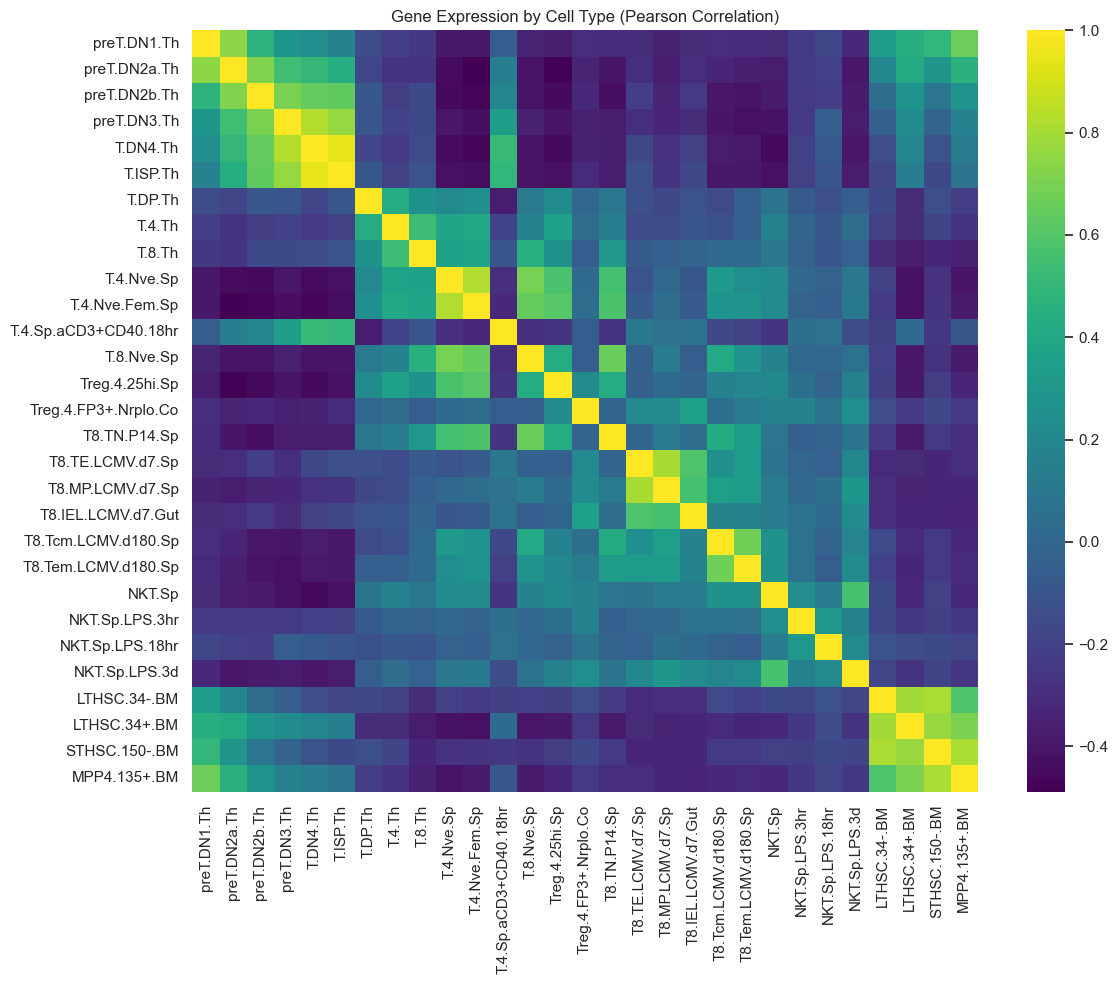

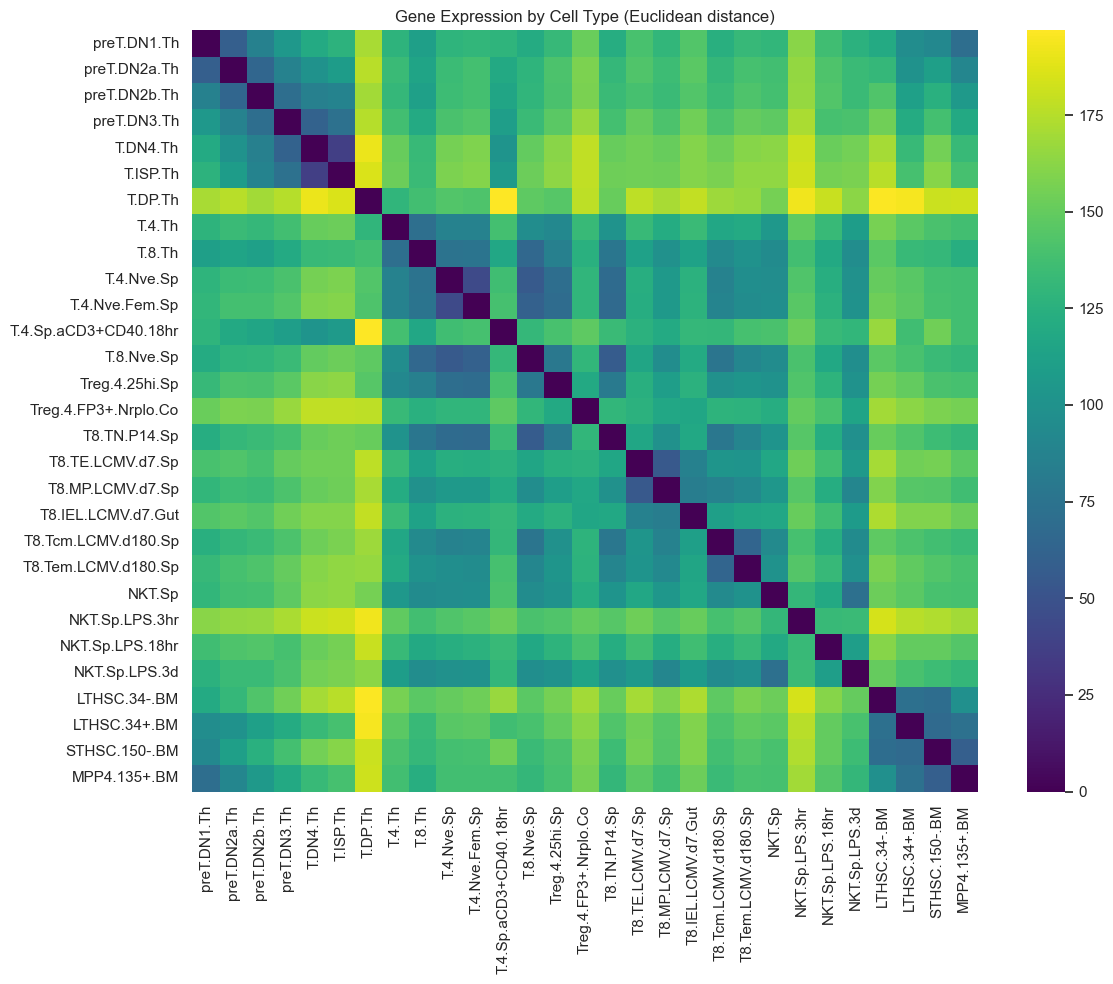

In [23]:
# Loading the matrix (again)
sample_matrix = transposed_scaled_df

# Computing pairwise correlation matrix (Pearson correlation between samples)
correlation_matrix = sample_matrix.T.corr()

# Computing pairwise distance matrix (Euclidean distance between rows)
from scipy.spatial.distance import pdist, squareform
import pandas as pd

distance_matrix = pd.DataFrame(
    squareform(pdist(sample_matrix, metric='euclidean')),
    index=sample_matrix.index,
    columns=sample_matrix.index
)

## Plotting heatmap with sample names 
import seaborn as sns
import matplotlib.pyplot as plt

# For correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Gene Expression by Cell Type (Pearson Correlation)")
plt.tight_layout()
plt.show()

# For distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Gene Expression by Cell Type (Euclidean distance)")
plt.tight_layout()
plt.show()

**Fig. 9: Gene Expression Correlation (above) and Gene Expression Distance (below) by Cell Types**

**Pearson Correlation Heatmap**

This heatmap visualizes the pairwise Pearson correlation coefficients between gene expression profiles of different cell types. Overall, the heatmap highlights relative similarity (regardless of expression magnitude). The clusters, which present as blocks of bright colors, show groups of cell types with similar expression pattern. Brighter colors (yellow) indicate highly similar expression (correlation close to 1) while darker ones (blue/purple) indicate less similarity, or even anti-correlation (correlation near 0 or negative).

**Euclidean Distance Heatmap**

This heatmap visualizes Euclidean distances between cell type gene expression profiles. Overall, it captures absolute differences in expression levels. The distinct color transitions separate cell types that are globally different more clearly. Here, brighter colors mean greater distances (cell types are more different) while darker ones mean cell types are more similar (closer in gene expression space).

#### Gene expression heatmaps per cell groups

Here, the Pearson correlation helps reveal functional similarity and co-regulation. It is good for seeing whether groups have “parallel” expression programs while the Euclidean distance gives a sense of overall “transcriptome distance,” which may better separate very distinct types or states.

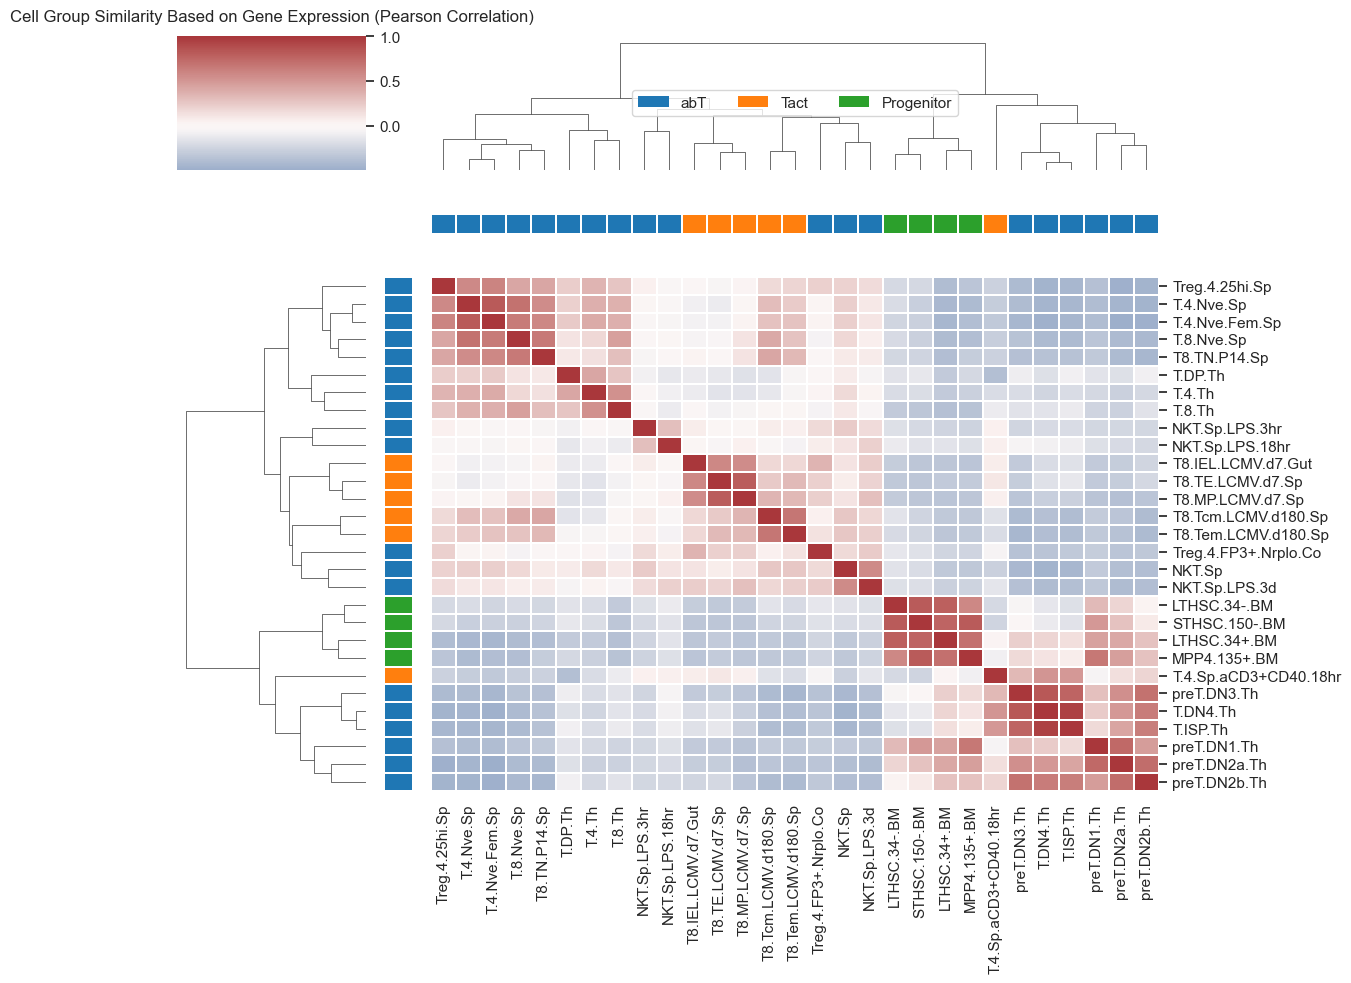

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


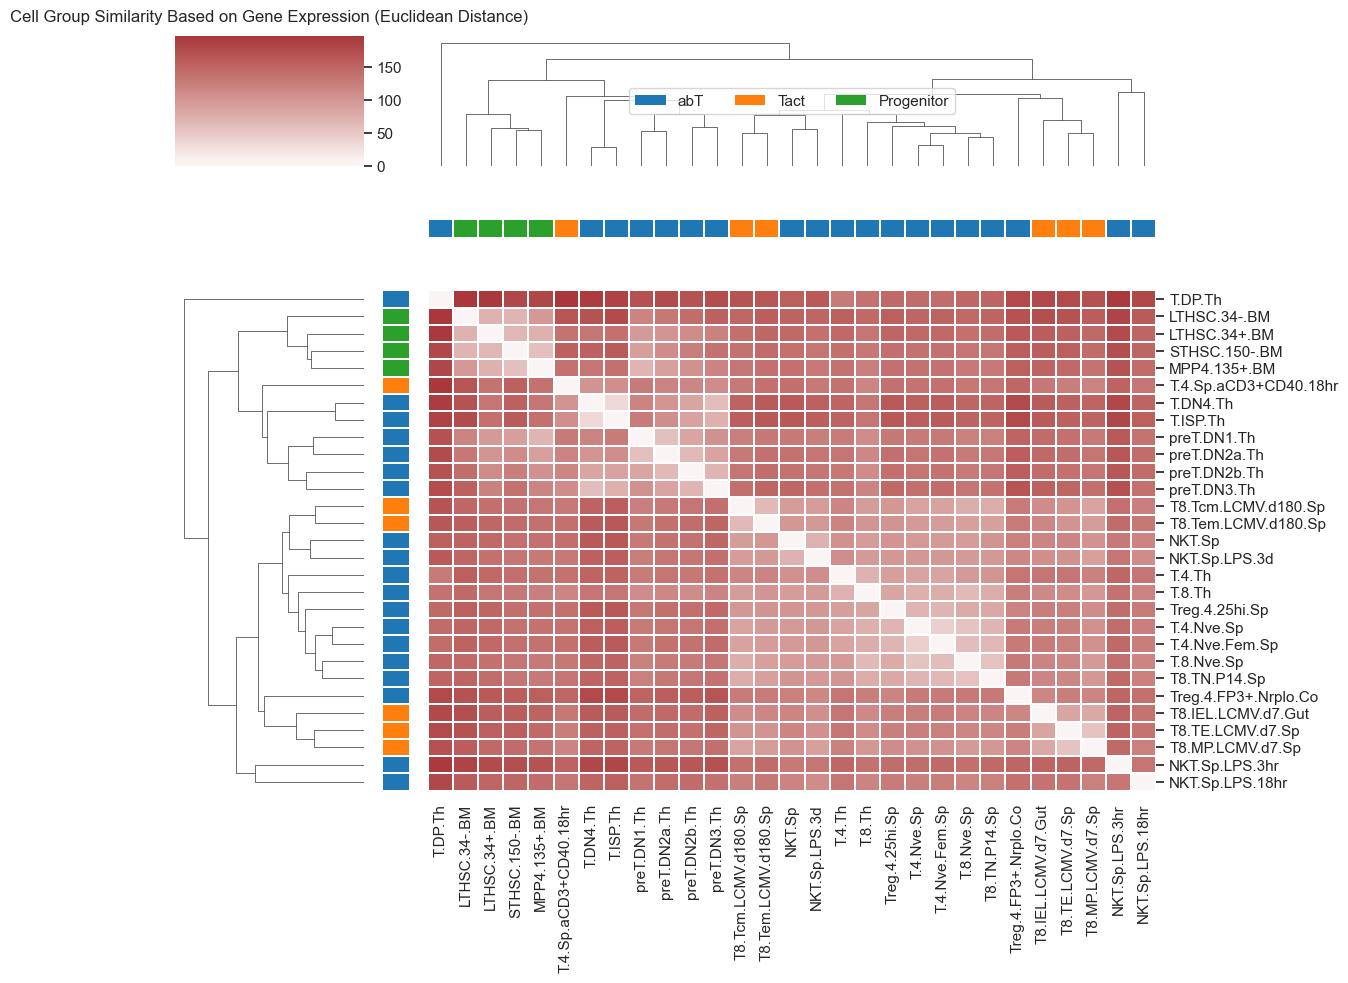

In [24]:
# Pearson Correlation and Euclidean distance matrix per cell groups (abT, Tact and progenitor)
## Preparing group mapping 
group_series = pca_df["Group"] # works because the group info is already added to the PCA DataFrame

## Creating color palette for row labels
import seaborn as sns

group_palette = {
    "abT": "#1f77b4",      # blue
    "Tact": "#ff7f0e",     # orange
    "Progenitor": "#2ca02c"  # green
}

### Creating a color list in the same order as correlation_matrix rows
row_colors = correlation_matrix.index.map(group_series).map(group_palette)

### Create a color list in the same order as distance_matrix rows
row_colors = distance_matrix.index.map(group_series).map(group_palette)

## Plotting heatmap with colored labels
import seaborn as sns
import matplotlib.pyplot as plt

### For Pearson correlation_matrix
sns.set(style="white")
g = sns.clustermap(
    correlation_matrix,
    row_colors=row_colors,
    col_colors=row_colors,
    figsize=(12, 10),
    cmap="vlag",  
    center=0,
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=3)

plt.title("Cell Group Similarity Based on Gene Expression (Pearson Correlation)", y=1.05)
plt.tight_layout()
plt.show()

### For Euclidean distance_matrix
sns.set(style="white")
g = sns.clustermap(
    distance_matrix,
    row_colors=row_colors,
    col_colors=row_colors,
    figsize=(12, 10),
    cmap="vlag",  
    center=0,
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=3)

plt.title("Cell Group Similarity Based on Gene Expression (Euclidean Distance)", y=1.05)
plt.tight_layout()
plt.show()



**Fig. 10: Heatmaps of Pearson Correlation and Euclidean Distance matrix per cell group**

**Pearson correlation heatmap**

Each cell in the heatmap represents the Pearson correlation coefficient between the gene expression profiles of two cell types. Bright red colors mean the two cell types are highly similar in their gene expression profiles. Blue/white mean they are less similar or even anti-correlated. The heatmap directly visualizes linear similarity in expression profiles. Block patterns (red squares along the diagonal) indicate clusters of cell types with highly similar gene expression — corresponding to known biological groups or states.

The pre T cell cluster shows a strong red block among themselves. These progenitor T cell types are highly correlated in their gene expression — meaning their transcriptional programs are very similar (probably reflecting developmental similarity). LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MPP4.135+.BM also form a red block together, indicating very high correlation within the stem cell group. There’s blue/white between stem cells and mature T cell types (e.g., T.8.Th or Treg.4.25hi.Sp), indicating low or even negative correlation — so these cell types have very different gene expression profiles. Additionally, the NKT cells have moderate to strong correlation among themselves, forming a light red block.

**Euclidean distance heatmap**

Each cell shows the Euclidean distance between the gene expression profiles of two cell types. Smaller values (white/light pink) mean more similar, while larger values (dark red) mean less similar (i.e., gene expression profiles are more different). The heatmap measures absolute differences in gene expression profiles, regardless of whether genes go up or down together. Tight, light-colored blocks indicate that groups of cell types are closely related in absolute expression space. Conversely, darker colors highlight cell types that are more transcriptionally distinct.

The stem cell types are grouped together with lighter squares (lower distances) among themselves and much darker squares (high distances) when compared to mature T or NKT cells. This means the absolute expression profiles of stem cells are both distinct from all others and very similar within the group. The preT cells also form a light block among themselves (lower distance), matching the high correlation seen above. However, the Euclidean distance makes the separation from non-preT cell types even starker — one can see a sharp contrast (dark color) between preT cells and, say, T8.TE.LCMV.d7.Sp or NKT.Sp. NKT cell types have lower distances between each other (lighter) but much higher distances to other groups—suggesting their absolute expression profiles are unique compared to other T cell types.

# 3. Gene clustering

#### K-means clustering on gene expression per cell types
Now task 2.ii) 


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\

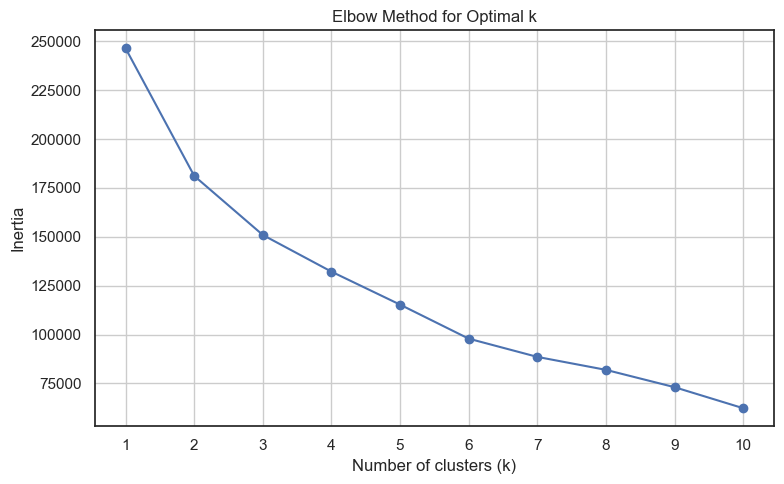

In [25]:
# Running elbow method for k-means clustering on cell types
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading matrix: samples × peaks
df = transposed_scaled_df

# Computing inertias for k 
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(df.values)
    inertias.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

**Fig. 11: Elbow method for optimal k on gene expression per cell types**

In [26]:
transposed_scaled_df.head()

,0610007P14Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,1110004E09Rik,1110004F10Rik,1110008L16Rik,...,Zswim8,Zufsp,Zw10,Zwilch,Zwint,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
preT.DN1.Th,-0.532894,0.822623,1.418314,1.099021,-0.785941,0.109691,-1.446886,-0.289624,0.471817,2.428524,...,-0.597779,-0.353662,-0.326015,0.269888,0.654322,-0.589419,0.518008,-1.129462,0.327774,0.405316
preT.DN2a.Th,0.416132,1.427842,0.331641,2.896547,-0.334382,0.067573,-1.005727,-0.280690,0.790105,1.766919,...,-1.098392,-0.482284,-0.053937,0.989087,0.894669,-0.876881,-0.114352,-1.051094,-0.520814,1.432838
preT.DN2b.Th,0.464170,1.734718,1.283357,1.076246,1.542094,0.577633,-1.214578,0.073977,0.779358,0.687129,...,-0.841516,-0.521230,0.145237,1.663907,0.226967,-0.644787,-0.667572,-1.249007,-0.733513,1.221996
preT.DN3.Th,0.233545,0.385080,0.182180,0.704736,1.078273,1.408093,-0.321137,2.180733,0.867061,0.498626,...,-0.862209,-0.483902,0.707891,1.175556,0.399973,-0.656465,-0.922359,-1.090809,0.055159,0.850077
T.DN4.Th,0.589881,1.172709,0.111572,1.738721,1.706792,0.312776,-0.751852,3.409110,1.679846,0.824119,...,-1.258557,-0.511057,1.389371,2.141805,0.205119,-0.786814,-1.101441,-1.246131,-0.264235,2.122208


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


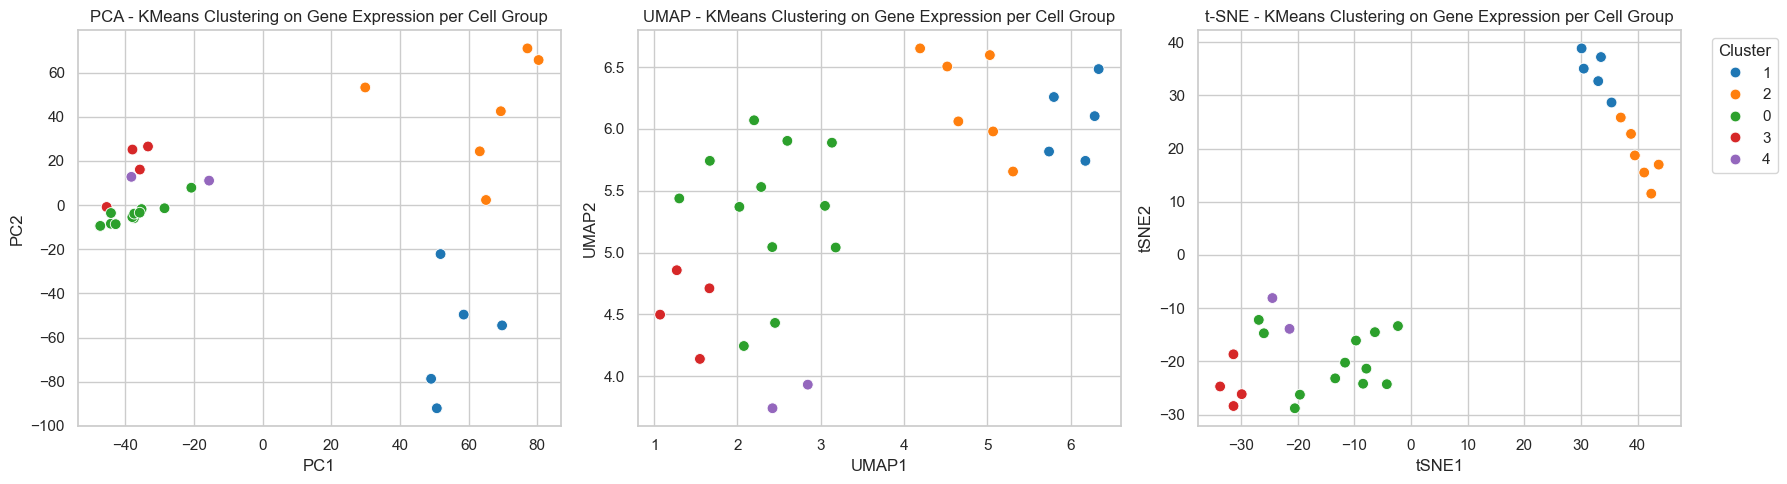

In [27]:
# Running k-means clustering on cell types 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Loading dataset
df = transposed_scaled_df

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

# K-Means clustering (k=5) 
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)

# Re-grouping cell subtypes into bigger cellular families
abT_cells = ["preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th","T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp"]

NKT_cells = ["NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"]

tact_cells = ["T.4.Sp.aCD3+CD40.18hr",
    "T8.TE.LCMV.d7.Sp",
    "T8.MP.LCMV.d7.Sp",
    "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp",
    "T8.Tem.LCMV.d180.Sp"]

stem_cells = [ "LTHSC.34-.BM", "LTHSC.34+.BM",
    "STHSC.150-.BM", "MPP4.135+.BM"]

# Mapping each cell to its group
group_map = {}

for sample in abT_cells:
    group_map[sample] = "abT"
for sample in NKT_cells:
    group_map[sample] = "NKT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"


# Building a results DataFrame
results_cells = pd.DataFrame(index=df.index)
results_cells["Cluster"] = labels.astype(str)
results_cells["Group"]   = results_cells.index.map(lambda s: group_map.get(s, "Other"))

# Dimensionality reduction 
# PCA
pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(X)
results_cells["PC1"], results_cells["PC2"] = coords_pca[:, 0], coords_pca[:, 1]

# UMAP
umap = UMAP(n_components=2, random_state=42)
coords_umap = umap.fit_transform(X)
results_cells["UMAP1"], results_cells["UMAP2"] = coords_umap[:, 0], coords_umap[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(X)
results_cells["tSNE1"], results_cells["tSNE2"] = coords_tsne[:, 0], coords_tsne[:, 1]

# Plotting side-by-side 
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=results_cells, x="PC1", y="PC2",
    hue="Cluster", palette="tab10", s=60, ax=axes[0]
)
axes[0].set_title("PCA - KMeans Clustering on Gene Expression per Cell Group")

sns.scatterplot(
    data=results_cells, x="UMAP1", y="UMAP2",
    hue="Cluster", palette="tab10", s=60, ax=axes[1]
)
axes[1].set_title("UMAP - KMeans Clustering on Gene Expression per Cell Group")

sns.scatterplot(
    data=results_cells, x="tSNE1", y="tSNE2",
    hue="Cluster", palette="tab10", s=60, ax=axes[2]
)
axes[2].set_title("t-SNE - KMeans Clustering on Gene Expression per Cell Group")

# Clean up legends
for ax in axes:
    ax.legend_.remove()
axes[2].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Fig. 12: PCA, UMAP, t-SNE of k-means clustering on gene expression per cell type**

In [28]:
# Adding biological Group into results
results_cells["Group"] = results_cells.index.map(lambda s: group_map.get(s, "Other"))

# Cross-tabulate Cluster vs Group
ct = pd.crosstab(
    results_cells["Cluster"],
    results_cells["Group"],
    rownames=["KMeans Cluster"],
    colnames=["Biological Group"]
)
print(ct)

Biological Group  NKT  Progenitor  Tact  abT
KMeans Cluster                              
0                   2           0     2    8
1                   0           4     0    1
2                   0           0     1    5
3                   0           0     3    1
4                   2           0     0    0


I want to use this results to make a gene map that will tells us which genes are expressed by which cluster, so by which cell group. However, we only want 3 groups - abT, Tact and progenitor cells. That's why we will merge clusters 0, 2 and 4.

In [29]:
# Merge clusters
import numpy as np

# Clusters to merge
to_merge = {"0","2","4"}

# Build conditions and choices
conds = [
    results_cells["Cluster"].isin(to_merge),
    results_cells["Cluster"] == "1",
    results_cells["Cluster"] == "3"
]
choices = [
    "abT",        
    "Progenitor", 
    "Tact"         
]

# Apply
results_cells["BiologicalGroup"] = np.select(
    conds,
    choices,
    default="Other"  
)

# Check the mapping
print(pd.crosstab(results_cells["Cluster"], results_cells["BiologicalGroup"]))


BiologicalGroup  Progenitor  Tact  abT
Cluster                               
0                         0     0   12
1                         5     0    0
2                         0     0    6
3                         0     4    0
4                         0     0    2


In [30]:
# Extracting marker genes per cell group expression 
import pandas as pd
import numpy as np
from scipy import stats

# Load datasets 
expr_df = refined_df

# Prepare container
marker_genes = {}

for grp in results_cells["BiologicalGroup"].unique():
    # Boolean masks of cells in vs out of this group
    in_cells  = results_cells.index[ results_cells["BiologicalGroup"] == grp ]
    out_cells = results_cells.index[ results_cells["BiologicalGroup"] != grp ]

    # Compute mean expression inside vs outside
    mu_in  = expr_df[in_cells].mean(axis=1)
    mu_out = expr_df[out_cells].mean(axis=1)

    # Fold‐change
    fc = mu_in.div(mu_out + 1e-9)

    # T‐test
    tstat, pval = stats.ttest_ind(
        expr_df[in_cells].T,
        expr_df[out_cells].T,
        axis=0, equal_var=False, nan_policy="omit"
    )

    # Assemble into a DataFrame and rank
    df = pd.DataFrame({
        "gene": expr_df.index,
        "fc":   fc.values,
        "pval": pval
    }).dropna()

    # Filter for genes up in this group and sort by fold‐change (or p‐value)
    df = df.query("fc > 1").sort_values("fc", ascending=False)

    # Take top N
    marker_genes[grp] = df["gene"].tolist()

# marker_genes is a dict: { "abT": [...], "Progenitor": [...], "Tact": [...] }
for grp, genes in marker_genes.items():
    print(f"\nMarkers for {grp} (n={len(genes)}):")
    print(genes)


Markers for Progenitor (n=3656):
['Mpl', 'Adgrl4', 'Flt3', 'Meis1', 'Lmo2', 'Tie1', 'Gata2', 'Prtn3', 'Mmrn1', 'Myct1', 'Hlf', 'Csf3r', 'Pbx1', 'Ptrf', 'Mecom', 'Esam', 'Procr', 'Fkbp9', 'Cd63', 'Sdsl', 'Pcp4l1', 'Pf4', 'Trpc6', 'Nkx2-3', 'Mamdc2', 'Tbxas1', 'Ppp1r9a', 'Grb10', 'Car2', 'Gng11', 'Ndn', 'Pdzk1ip1', 'Krt18', 'Hoxa9', 'Tek', 'Cd34', 'Rbp1', 'Col4a2', 'Hacd4', 'Prkcdbp', 'Ifitm1', 'Tinagl1', 'Robo4', 'Gcnt2', 'Cd300a', 'F11r', 'Col4a1', 'Casp12', 'Emcn', 'Bgn', 'Il12a', 'Sgsm1', 'Vwf', 'Mef2c', 'Aldh1a1', 'Tfr2', 'Spns2', 'Sdpr', 'Rab38', 'Ptgs1', 'Vldlr', 'Fstl1', 'Eya1', 'Trim47', 'Fhl1', 'Efcc1', 'Tmem40', 'Sox6', 'Dach1', 'Hnmt', 'Hoxa10', 'Tfec', 'Wdfy3', 'Crispld1', 'Mmp2', 'Csgalnact1', 'Epb41l3', 'Gp9', 'Slc6a15', 'Sgce', 'Tmem98', 'Wfdc17', 'Tmem246', 'Tal1', '5930403L14Rik', 'Pkd2', 'Gas6', 'Gstm5', 'Afap1l1', 'Cyp2j6', 'Zfp521', 'Col16a1', 'Obsl1', 'Hk3', 'Nrxn1', 'Muc13', 'F630028O10Rik', 'Obscn', 'Bcl11a', 'Mgst1', 'Ltbp3', 'Mpo', 'Mctp1', 'Plscr4', 'Lyz2', 'C

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\scipy\stats\_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\scipy\stats\_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [31]:
import pandas as pd

# marker_genes is the dict: { "abT": [...], "Progenitor": [...], "Tact": [...] }
records = []
for grp, genes in marker_genes.items():
    for g in genes:
        records.append({"Group": grp, "Gene": g})

out_df = pd.DataFrame.from_records(records, columns=["Group","Gene"])

# write to disk
out_df.to_csv("marker_genes_by_cell_group.csv", index=False)

We want to see if there are any genes expressed across different cell grops and which ones they are.

In [32]:
import pandas as pd
from itertools import combinations

# Reload your markers table
df = pd.read_csv("marker_genes_by_cell_group.csv")

# Build gene → set(groups) mapping
gene2groups = df.groupby("Gene")["Group"].apply(lambda s: set(s)).to_dict()

# Bucket genes by their group‐set (only >1)
shared_buckets = {}
for gene, groups in gene2groups.items():
    if len(groups) > 1:
        key = tuple(sorted(groups))
        shared_buckets.setdefault(key, []).append(gene)

# Print per combination
for combo, genes in sorted(shared_buckets.items(), key=lambda x: (len(x[0]), x[0])):
    combo_str = " & ".join(combo)
    print(f"Shared between {combo_str} ({len(genes)} genes):")
    print(", ".join(sorted(genes)))
    print()


Shared between Progenitor & Tact (714 genes):
0610007P14Rik, 1110059E24Rik, 2410006H16Rik, 2610001J05Rik, 2610524H06Rik, 2700060E02Rik, 2700094K13Rik, 3830406C13Rik, 4930402H24Rik, 5430427O19Rik, 9030624J02Rik, A830080D01Rik, AI662270, Aaed1, Abca2, Abcb10, Abcb1b, Abcc4, Abi2, Acadl, Acads, Aco1, Acot7, Acp1, Acsl5, Adamts10, Adipor1, Aim2, Ak3, Akip1, Akr1a1, Akt1, Alad, Alcam, Aldh16a1, Aldoa, Aldoc, Amdhd2, Anapc7, Ank, Anxa1, Anxa4, Anxa5, Anxa7, Ap1s1, Ap2m1, Ap3b1, Apbb1, Apip, Aplp2, Apoa1bp, Apobr, Aprt, Arf1, Arhgap17, Arhgap18, Arl1, Armc10, Arrdc1, Arrdc3, As3mt, Asah1, Asl, Asns, Asnsd1, Asrgl1, Atg4b, Atg7, Atp2a3, Atp2b4, Atp5c1, Atp5j, Atp6v0a1, Atp6v0b, Atp6v1a, Atp6v1f, Atraid, Axl, B3gnt5, BC003331, BC004004, Bag3, Bend4, Bin2, Bin3, Blmh, Borcs7, Brcc3, Bre, Brox, Bscl2, Bsg, Btf3, Cab39l, Calhm2, Camk2g, Capg, Capns1, Capza2, Casp1, Casp3, Casp4, Casp7, Cat, Cbfb, Ccdc50, Ccdc69, Cd200r1, Cd244, Cd44, Cd72, Cd99l2, Cdc14a, Cdc37, Cdc42, Cdc42ep3, Cdk17, Cercam, Cer

In [33]:
import pandas as pd

# Reload markers table
df = pd.read_csv("marker_genes_by_cell_group.csv")

# Build gene → set(groups) mapping
gene2groups = df.groupby("Gene")["Group"].apply(lambda s: set(s)).to_dict()

# Compute “full” set of all lineages
all_lineages = set(df["Group"].unique())

# Find genes shared by every lineage
shared_all = [gene for gene, groups in gene2groups.items() if groups == all_lineages]

print(f"Genes shared across all {len(all_lineages)} lineages ({len(shared_all)}):")
print(", ".join(sorted(shared_all)) or "None")


Genes shared across all 3 lineages (0):
None


#### K - means clustering on genes

In [34]:
print(refined_df.shape)
refined_df.head()

(8494, 29)


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,168.924363,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,32.753248,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,86.523573,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464
0610010F05Rik,155.767862,273.998186,154.269870,129.834226,197.843435,173.726109,58.203391,42.950719,26.099208,40.183229,...,29.771841,71.347412,35.723998,11.660369,27.574347,54.965951,75.934142,172.175681,119.156447,174.554003
0610010K14Rik,146.959609,166.023337,245.243593,225.662176,252.196726,245.295957,84.157303,204.219996,198.168772,199.553377,...,184.547689,175.993310,110.913976,137.817664,132.083765,123.633828,149.566205,201.786082,155.028950,160.824830


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize across rows (i.e. for each gene)
scaler = StandardScaler()
row_scaled = scaler.fit_transform(refined_df.T).T  # Transpose -> scale -> transpose back

# Create a new DataFrame with same index/columns
row_scaled_df = pd.DataFrame(row_scaled, index=refined_df.index, columns=refined_df.columns)

# Check result
row_scaled_df.head()


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,-0.398302,...,0.401049,0.381103,-0.467569,-1.162795,-1.277198,0.163418,0.397041,1.254970,0.105091,0.359435
0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,-0.661936,...,-0.521017,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,1.251433,1.275182,0.855159,1.173505
0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,-0.885689,...,-0.851788,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,1.680819,1.345800,1.283784,2.231347
0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,-0.658282,...,-0.816572,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,-0.114739,1.348479,0.542396,1.384638
0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,0.459838,...,0.104401,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,-0.724199,0.512724,-0.594804,-0.457518


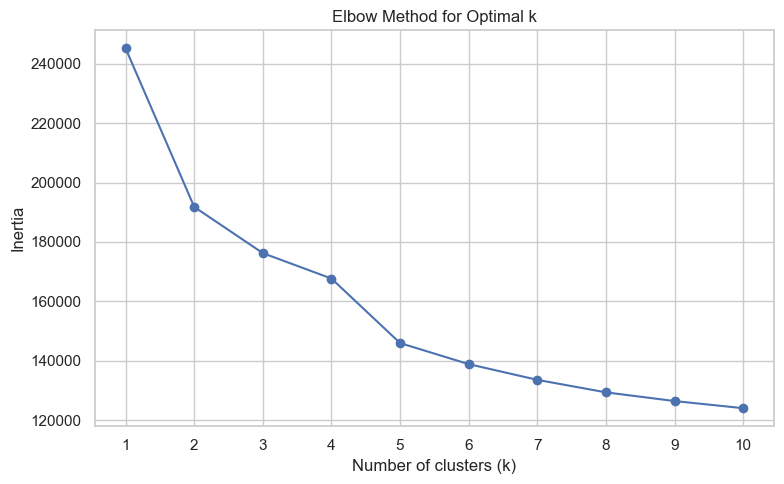

In [36]:
# Running elbow method for k-means clustering on genes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading matrix: samples × genes
df = row_scaled_df

# Computing inertias for k 
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(df.values)
    inertias.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

**Fig. 13: Elbow method for optimal k for k-means clustering on genes**

The graph shows the optimal number of clusters to be k = 5. Now, we will run the k-means clustering on genes with k = 5.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


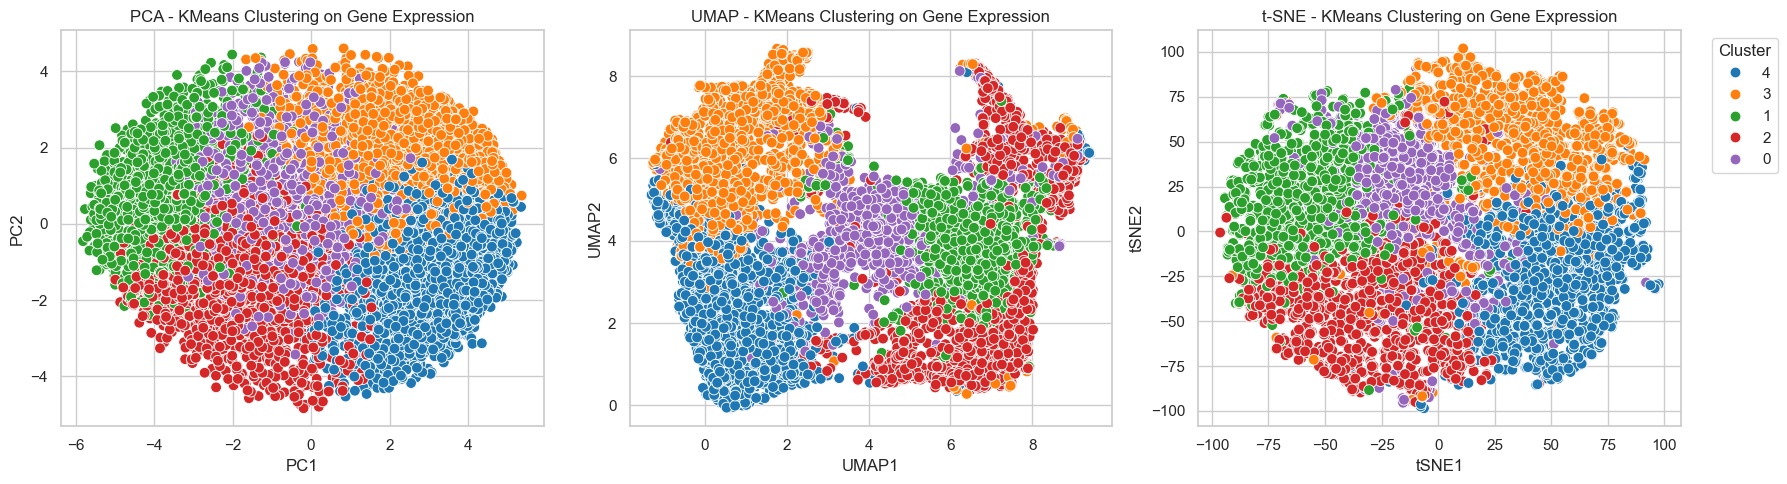

In [37]:
# Running k-means clustering on genes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Loading dataset
df = row_scaled_df

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

# K-Means clustering (k=5) 
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)

# Building  a results DataFrame
results_genes = pd.DataFrame(index=df.index)
results_genes["Cluster"] = labels.astype(str)

# Dimensionality reduction 
# PCA
pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(X)
results_genes["PC1"], results_genes["PC2"] = coords_pca[:, 0], coords_pca[:, 1]

# UMAP
umap = UMAP(n_components=2, random_state=42)
coords_umap = umap.fit_transform(X)
results_genes["UMAP1"], results_genes["UMAP2"] = coords_umap[:, 0], coords_umap[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(X)
results_genes["tSNE1"], results_genes["tSNE2"] = coords_tsne[:, 0], coords_tsne[:, 1]

# Plotting side-by-side 
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=results_genes, x="PC1", y="PC2",
    hue="Cluster", palette="tab10", s=60, ax=axes[0]
)
axes[0].set_title("PCA - KMeans Clustering on Gene Expression")

sns.scatterplot(
    data=results_genes, x="UMAP1", y="UMAP2",
    hue="Cluster", palette="tab10", s=60, ax=axes[1]
)
axes[1].set_title("UMAP - KMeans Clustering on Gene Expression")

sns.scatterplot(
    data=results_genes, x="tSNE1", y="tSNE2",
    hue="Cluster", palette="tab10", s=60, ax=axes[2]
)
axes[2].set_title("t-SNE - KMeans Clustering on Gene Expression")

# Clean up legends
for ax in axes:
    ax.legend_.remove()
axes[2].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Fig. 14: PCA, UMAP, t-SNE of k-means clustering on gene expression**

We need to save the results to be able to do gene ontology in the next step.

In [38]:
results_genes.head()

,Cluster,PC1,PC2,UMAP1,UMAP2,tSNE1,tSNE2
0610007P14Rik,4,2.005389,-2.379345,3.739681,0.765618,9.604010,-82.994553
0610009B22Rik,4,5.004460,-0.434155,-0.637933,2.596470,91.674576,-14.195685
0610009O20Rik,3,4.342743,1.164117,-0.077603,5.254172,77.519966,13.968493
0610010F05Rik,4,4.682487,0.125331,-0.572638,4.202839,89.209473,2.455684
0610010K14Rik,4,1.171907,-2.630124,1.548237,0.638577,33.599251,-52.991222


In [39]:
# Save as pickle file for GO

# select the first two columns
results_genes = results_genes.iloc[:, :2]

# save to a pickle file
results_genes.to_pickle('gene_clusters_for_GO.pkl')